# Final Project - PHYS1655 Fall 2022
## Classification of Astrophysical Objects (100 points total - 10 points each part)
---

## Background

There is an introduction to the project on the course Wiki:
https://confluence.its.virginia.edu/display/2P1C/Final+Fall+2022
___

## Assignment

Ok, now that you understand a little bit about the dataset that we are working with, we can get started!

Unless specified otherwise you may use any tool we learned about to accomplish the tasks below.  For example, in part a) you can use a simple readlines() command and then loop over the lines in the file to calculate the requested quantities, or you can use a more advanced tool from Numpy or Pandas if you are aware of one. Use whatever you are most comfortable with to get the job done. 
___

## a) First Look

Write a program that reads in the dataset skyserver.csv, which is in your repository. Calculate the average and standard deviation for each feature and each class. Make a summary table of the following form. Make sure it is human-readable (it doesn't need lines or boxes, but needs reasonable spacing). **Also, how many entries are in this sample? How many of each class are there?**


In [5]:
# Put your code here
#Sophia Spaner
#Created for Physics 1650
#Purpose: To analayze the Sloan Digital Sky Survery data.
#Date:12/13/2022
#ON MY HONOR AS A STUDENT I HAVE NEITHER GIVEN NOR RECEIVED UNAURTHORIZED AID ON THIS ASSIGNMENT
#-----------------------------------------------------------------------------------------------
#Comment Key:
#(codeA) + comment = comment on that particular line
#(codeA)
#comment
#(codeB)
# = comment for a particular section of code beginning with codeB
#(Code)+'note'(comment)= commentary on the way the code was accomplished
#commented(Code)+comment = comment on code that was commented out
#(codeA)
#COMMENT
#(codeB)
# = comment for a particular section heading of code beginning with codeB
#-----------------------------------------------------------------
#Imports:
import pandas as pd
import numpy as np
import scipy 
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import chi2
import math
import matplotlib
from matplotlib import pyplot as plt 
from matplotlib import patches
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import roc_curve, auc
#-----------------------------------------
#Main Function:
sky_df = pd.read_csv('skyserver.csv') #Reads the datafile, inserts it into a Pandas dataframe
#Groups the code into classes
starclass = sky_df.groupby('class')
galaxy_df = starclass.get_group('GALAXY')
star_df = starclass.get_group('STAR')
qso_df = starclass.get_group('QSO')
#print(qso_df) - #used to test the get_group function
#grabs the mean of each group
x = galaxy_df.mean()
y = star_df.mean()
z = qso_df.mean()
avedf = pd.DataFrame({'galaxy mean': x, 'star mean': y, 'qso mean': z}) #Dataframes the mean
#grabs the standard deviation of each group
x1 = galaxy_df.std()
y1 = star_df.std()
z1 = qso_df.std()
stddf = pd.DataFrame({'galaxy std': x1, 'star std': y1, 'qso std': z1})#Dataframes the stadard deviation
#combines those two dataframes together
joineddf = avedf.join(stddf)

print(joineddf)
#grabs total numbers of everythng
numtot = len(sky_df)
numgalaxy = len(galaxy_df)
numstar = len(star_df)
numqso = len(qso_df)
#print statement for final data
print(f'\nThis data set has {numtot} entries\nTotal galaxy entries = {numgalaxy}\nTotal star entries = {numstar}\nTotal quasar entries = {numqso}')


          galaxy mean  star mean   qso mean  galaxy std  star std   qso std
u           18.804339  18.330439  18.942928    0.692389  0.929816  0.569208
g           17.350216  17.130547  18.678714    0.757240  0.988460  0.614986
r           16.649506  16.732093  18.498535    0.848500  1.080897  0.673280
i           16.272770  16.594047  18.360007    0.885694  1.152151  0.719977
z           16.017923  16.531119  18.274761    0.947040  1.171915  0.774447
redshift     0.080325   0.000043   1.218366    0.046036  0.000410  0.697699

This data set has 10000 entries
Total galaxy entries = 4998
Total star entries = 4152
Total quasar entries = 850


Put your narrative here

---

## b) Histograms
Make and plot a histogram for the "r band" feature. On the same axis, include the distributions for the 3 different classes, drawing each one in a different color, and include a legend. Remember the axis labels and a title!

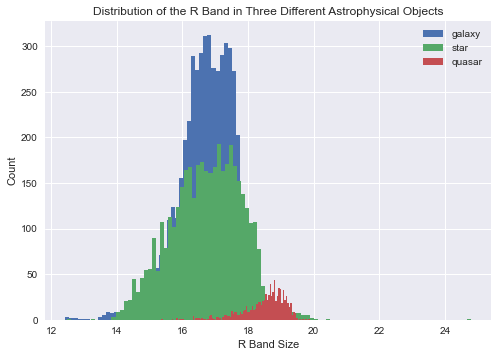

In [28]:
# Put your code here
plt.figure() # opens the plot
#Creates histograms: note(This could have been accomplished with loops later on and in will be later, but I didn't think to do that until after it was too late to go back)
bin_values, bins, myart = plt.hist(galaxy_df['r'], bins=100, label='galaxy')
bin_values1, bins1, myart1 = plt.hist(star_df['r'], bins=100, label = 'star')
bin_values2, bins2, myart2 = plt.hist(qso_df['r'], bins=100, label = 'quasar')
#plot title, label, key
plt.title('Distribution of the R Band in Three Different Astrophysical Objects')
plt.xlabel('R Band Size')
plt.ylabel('Count')
plt.legend()
plt.savefig('R-Band Histogram.png')

Put your narrative here

---

## c) Gaussian Fits
For the "r band" histograms above, fit the three distributions to a Gaussian function and extract the mean and sigma, as well as the uncertainty from the fits. Compare to the values in the first feature column on the table in part a.  **Are they close?**

In [7]:
# Put your code here

gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig) #gaussian function used for the fit
#curve fit for the gaussian function
centers = (0.5*(bins[1:]+bins[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers, bin_values, p0=[16.5,.8,300])
#function that grabs the uncertainty and returns it for each section
def uncert():
    row = []
    for i in range(0,3):
        x = math.sqrt(cov[i,i])
        row.append(x)
    return(row)
y = uncert() #used for the first section of 'bins' I.E. galaxy
#Grabs all the parameters in the print statement: note(This is a mistake fixer, I will use this later on to run loops)
murow = []
sigmarow = []
alpharow = []
covrow = []
def getparams(): #function to get those parameters
    murow.append(pars[0])
    sigmarow.append(pars[1])
    alpharow.append(pars[2]) 
    for i in range(0,3):
        covrow.append(y[i])
getparams() #run for galaxy
print(f"The best fit parameters for Galaxy are: mu={pars[0]:4.2f}+-{y[0]:4.2f}  sigma={pars[1]:4.2}+-{y[1]:4.2f} a={pars[2]:4.2f}+-{y[2]:4.2f}")
#run for star
centers1 = (0.5*(bins1[1:]+bins1[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers1, bin_values1, p0=[16.5,1,300])#each of these has guess parameters attached based on the original mean
y = uncert()
getparams()
print(f"The best fit parameters for Star are: mu={pars[0]:4.2f}+-{y[0]:4.2f}  sigma={pars[1]:4.2}+-{y[1]:4.2f} a={pars[2]:4.2f}+-{y[2]:4.2f}")
#run for quasar
centers2 = (0.5*(bins2[1:]+bins2[:-1]))
pars, cov = scipy.optimize.curve_fit(gaus_func, centers2, bin_values2, p0=[18,.6,300])
y = uncert()
getparams()
print(f"The best fit parameters for Quasar are: mu={pars[0]:4.2f}+-{y[0]:4.2f}  sigma={pars[1]:4.2}+-{y[1]:4.2f} a={pars[2]:4.2f}+-{y[2]:4.2f}")
#print statement for ease of comparison
print(f'\n{joineddf}')

The best fit parameters for Galaxy are: mu=16.81+-0.02  sigma=0.75+-0.02 a=605.27+-14.39
The best fit parameters for Star are: mu=16.81+-0.03  sigma= 1.1+-0.03 a=518.66+-10.51
The best fit parameters for Quasar are: mu=18.74+-0.02  sigma=0.45+-0.02 a=34.65+-1.37

          galaxy mean  star mean   qso mean  galaxy std  star std   qso std
u           18.804339  18.330439  18.942928    0.692389  0.929816  0.569208
g           17.350216  17.130547  18.678714    0.757240  0.988460  0.614986
r           16.649506  16.732093  18.498535    0.848500  1.080897  0.673280
i           16.272770  16.594047  18.360007    0.885694  1.152151  0.719977
z           16.017923  16.531119  18.274761    0.947040  1.171915  0.774447
redshift     0.080325   0.000043   1.218366    0.046036  0.000410  0.697699


The data from above is included for ease of comparison. Here, the model does a very good job in predicting the mean of the function. However, it appears that the guess on the sigma is significiantly distant from the actual value of the sigma. From a pleminary anaylisis of the histogram plot this is probably on the account of the fact that though the data for each class largely concetrates in one area(meaning the average will be more accurate for each), it doesn't distribute as evenly throughout the graph. 

---

## d) Plot Fit Results

Make three plots, or a single plot with 3 subfigures, and draw the "r band" histogram with its best fit Gaussian function. Print the fit values and uncertainties on the figure (title or with a label of some kind).

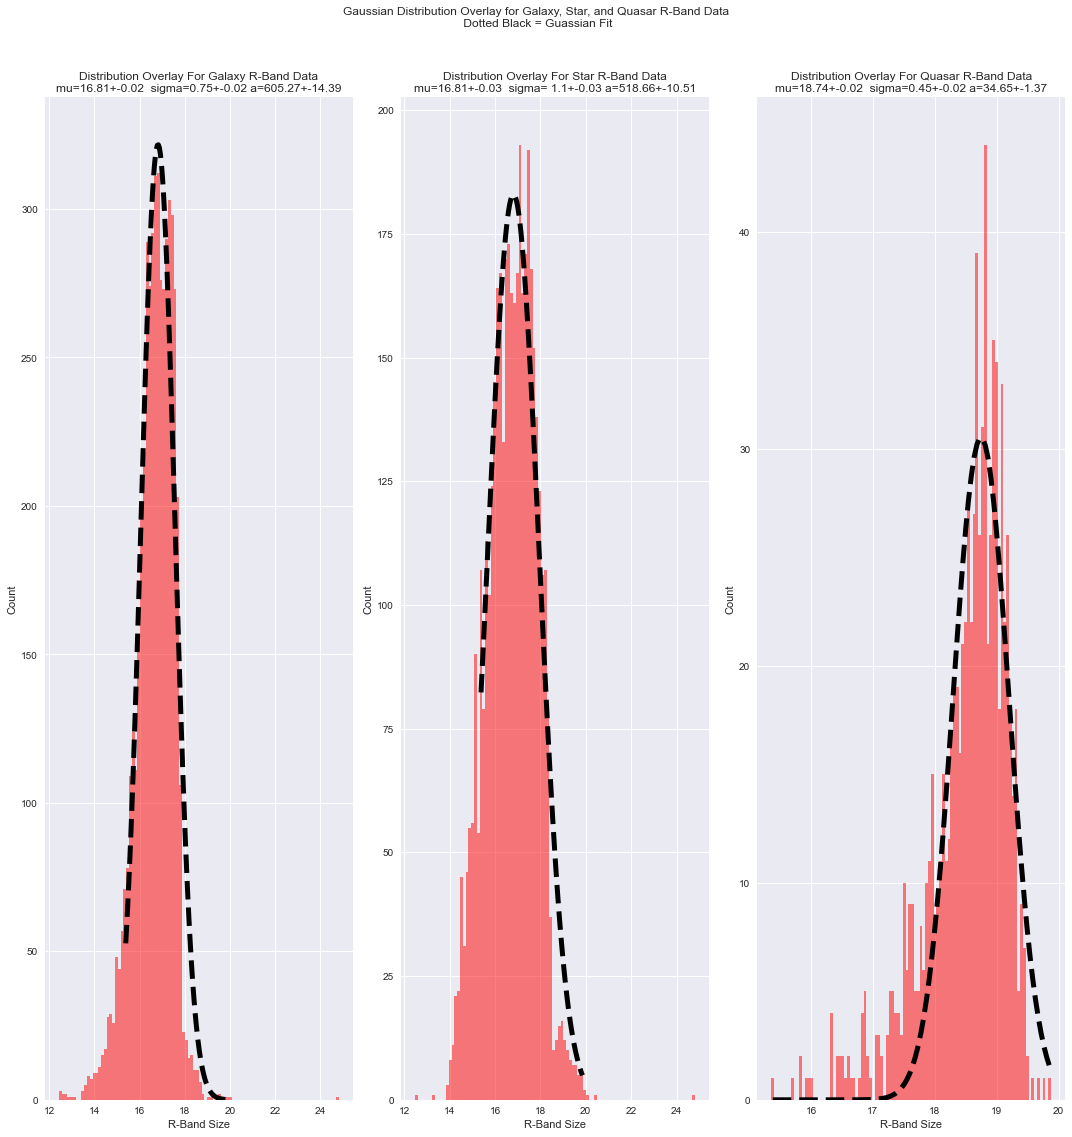

In [30]:
# Put your code here
#bin_values, bins, myart = plt.hist(galaxy_df['r'], bins=100, label='galaxy') - used to replicate this code

gaus_func=lambda x, mu, sig, a : a*norm.pdf(x, loc=mu, scale=sig)#rewritten for ease of creating this cell 
#lists for creating loops: note(This is how I fix the earlier mistake, now everythin can be called from this list and the loops can be run)
rlist = [galaxy_df['r'],star_df['r'],qso_df['r']]
rtitle = ['Galaxy','Star','Qso']
binvals =[]
binss = []
myartt = []
#for loop which gathers the data from the three histogram functions
for i in range(0,3):
    bin_values, bins, myart = plt.hist(rlist[i], bins=100, label='galaxy')
    binvals.append(bin_values)
    binss.append(bins)
    myartt.append(myart)
    #print(len(bins))
    plt.close()#to ensure that only the data is grabbed, but these particular histograms aren't oppend

centersrow = []
#loop for the centers
for i in range(0,3):
    centers = (0.5*(binss[i][1:]+binss[i][:-1]))    
    centersrow.append(centers)
#Creating the figure
fig, axs = plt.subplots(1,3, figsize =(15,15))
#loop for the titles: (note)this loop probably could've been accomplished in a more consice way, but I couldn't figure out how to iterate through the covariance row
for i in range(0,3):
    axs[i].hist(rlist[i],100,alpha=.5,color = 'r')
    if i == 0: 
        axs[i].title.set_text(f'Distribution Overlay For Galaxy R-Band Data\nmu={murow[i]:4.2f}+-{covrow[i]:4.2f}  sigma={sigmarow[i]:4.2}+-{covrow[i+1]:4.2f} a={alpharow[i]:4.2f}+-{covrow[i+2]:4.2f}')
    if i == 1:          
        axs[i].title.set_text(f'Distribution Overlay For Star R-Band Data\nmu={murow[i]:4.2f}+-{covrow[i+2]:4.2f}  sigma={sigmarow[i]:4.2}+-{covrow[i+3]:4.2f} a={alpharow[i]:4.2f}+-{covrow[i+4]:4.2f}')
    if i == 2:
        axs[i].title.set_text(f'Distribution Overlay For Quasar R-Band Data\nmu={murow[i]:4.2f}+-{covrow[i+4]:4.2f}  sigma={sigmarow[i]:4.2}+-{covrow[i+5]:4.2f} a={alpharow[i]:4.2f}+-{covrow[i+6]:4.2f}')                      
    #plots the overlay of the gaussian fit to the histogram of the function                  
    axs[i].plot(centers, gaus_func(centers,murow[i],sigmarow[i],alpharow[i]), 'k--',linewidth = 5, label='fit before')
    axs[i].set_xlabel('R-Band Size')
    axs[i].set_ylabel('Count')
fig.tight_layout() #gives the appropriate spacing
plt.suptitle('Gaussian Distribution Overlay for Galaxy, Star, and Quasar R-Band Data\n Dotted Black = Guassian Fit',y=1.05)
plt.savefig('GuassianDistributionOverlay.png')
plt.show()


Put your narrative here

---

## e) Fit Quality
For the fit for the Galaxy data from part d, assess the quality of the fit. Plot the pull distribution for the residuals (class18 and class19). **Based on the pull distribution, does the Gaussian function describe the data well? Explain how you came to this conclusion. If the pull distribution was perfect, what would it look like? Hint: Use the statisitical uncertainty on each bin of the histogram.**

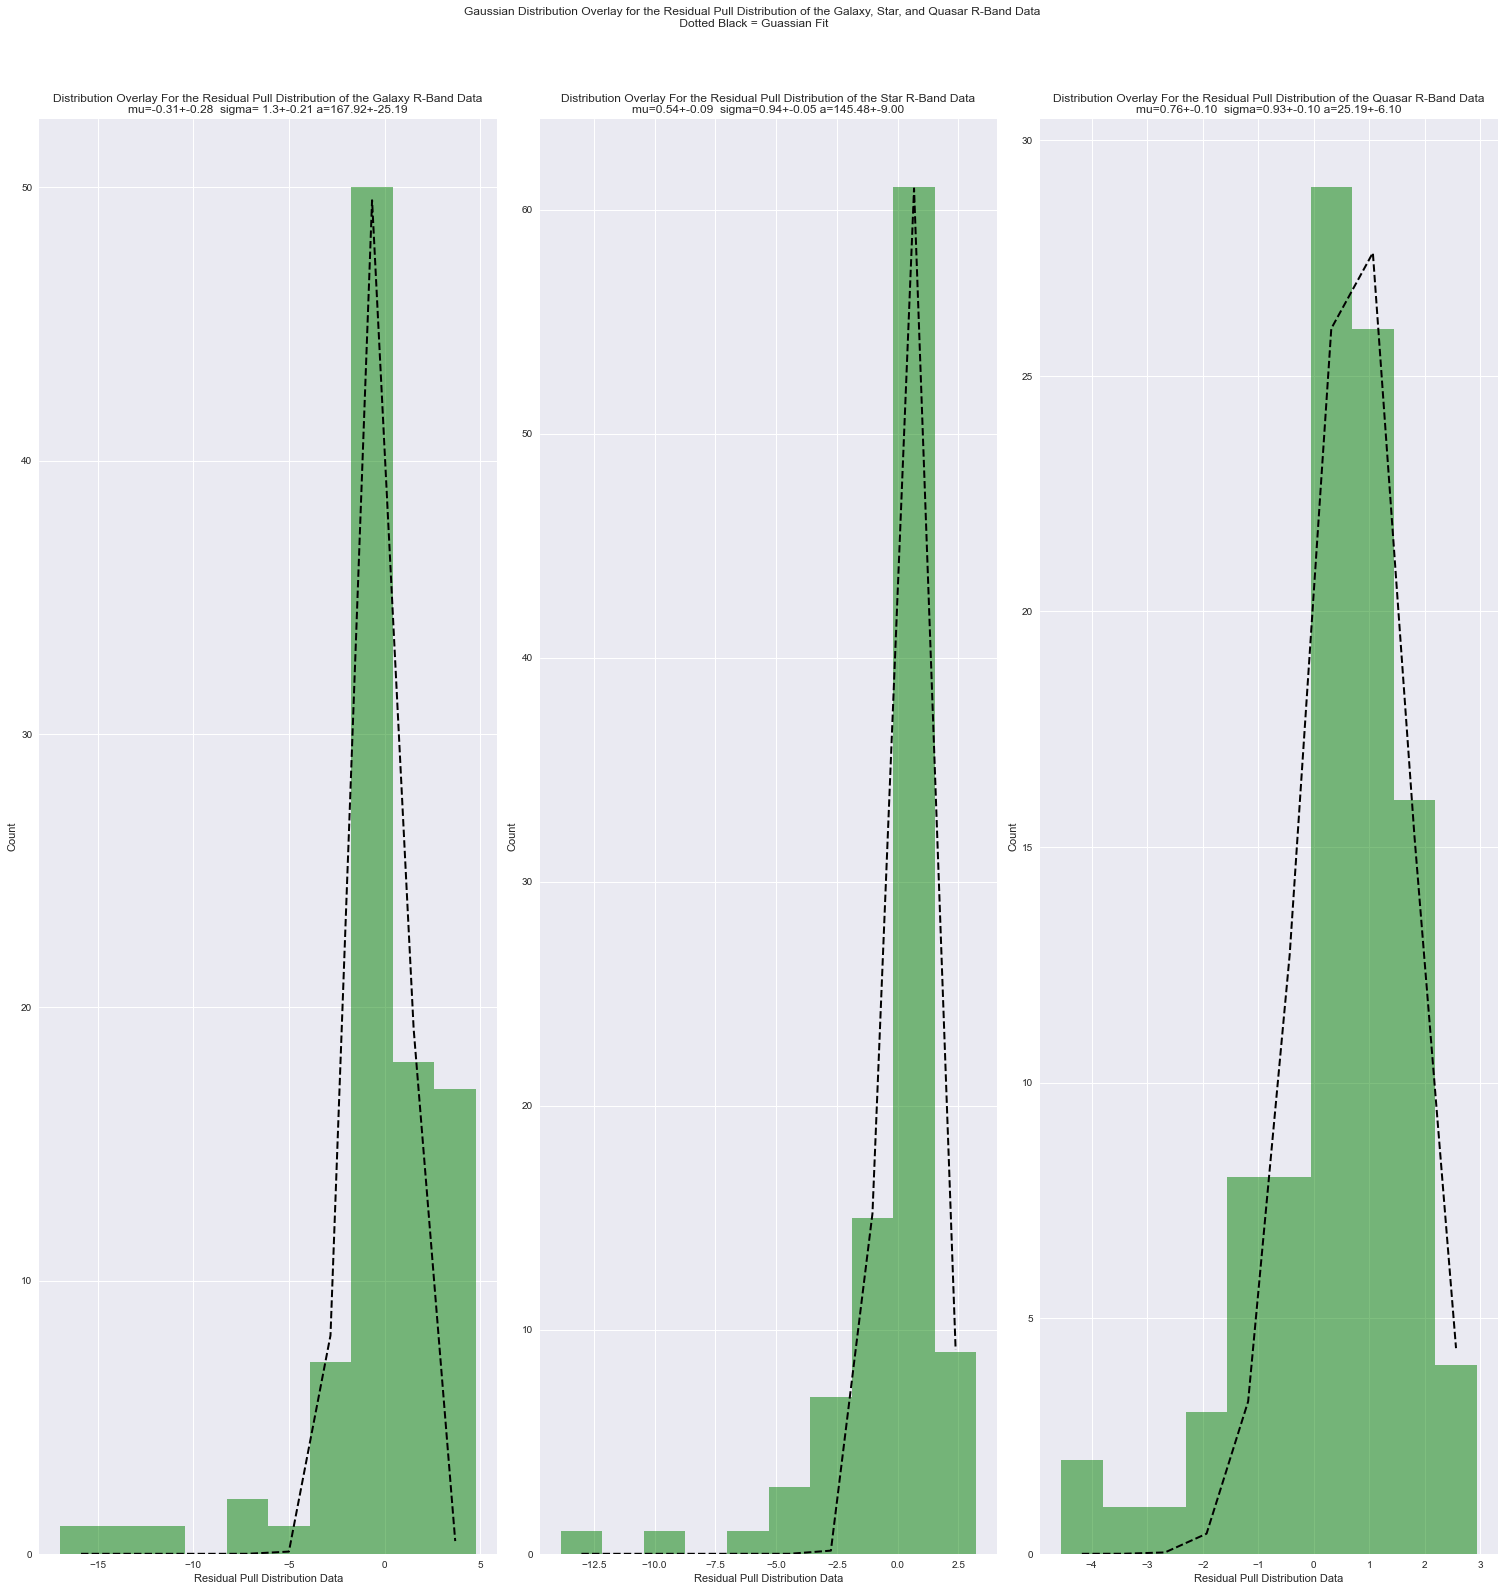

In [31]:
# Put your code here
f_res=[]
#loop which creats the residuals
for j in range(0,3):
    for i in range(len(binvals[j][1:-1])):
        res=0
        if (binvals[j][i]>=1):  #Avoid divide by zero...
            res = (binvals[j][i]-gaus_func(centersrow[j][i],murow[j],sigmarow[j],alpharow[j]))/math.sqrt(binvals[j][i])

        f_res.append(res)
#Creating the figure: (note)This is essentially the same thing as last time, just done with different information
fig, axs = plt.subplots(1,3,figsize = (21,21))#large figure used to convey the complicated titles
#function to grab the needed information to create the plot
pullbins = []
pullbinvals = []
def getpullparams():
    pullbins.append(bins)
    pullbinvals.append(bin_values)
#creation of the first three histograms: (note)the reason this wasn't done with a loop was because of the complication of splitting the residual data
bin_values, bins, myart = axs[0].hist(f_res[:98], 10, alpha=.5,color='g')
getpullparams()
bin_values, bins, myart = axs[1].hist(f_res[98:196], 10, alpha=.5,color='g')
getpullparams()
bin_values, bins, myart = axs[2].hist(f_res[196:294], 10, alpha=.5,color='g')
getpullparams()

#grabs the centers
pullcentersrow = []
for i in range(0,3):
    centers = (0.5*(pullbins[i][1:]+pullbins[i][:-1]))
    pullcentersrow.append(centers)
#for loop and list to grab all of the parameters of the three histograms
pullmu = []
pullsigma = []
pullalpha = []
pullcov = []
for i in range(0,3):
    pars, cov = scipy.optimize.curve_fit(gaus_func, pullcentersrow[i], pullbinvals[i], p0=[0,1,50])
    #print(f"The best fit parameters are: mu={pars[0]:4.4f} +-{np.sqrt(cov[0,0]):.4f}  sigma={pars[1]:4.4}+-{np.sqrt(cov[1,1]):.4f} a={pars[2]:4.2f}+-{np.sqrt(cov[2,2]):.4f}")
    pullmu.append(pars[0])
    pullsigma.append(pars[1])
    pullalpha.append(pars[2])
    for j in range (0,3):
        pullcov.append(np.sqrt(cov[j,j]))
#print(pullcov)  
#Same loop as above, used to create the titles & gaussian overlay: (note)See cell D
for i in range(0,3):
    axs[i].plot(pullcentersrow[i],gaus_func(pullcentersrow[i],pullmu[i],pullsigma[i],pullalpha[i]),'k--',linewidth = 2, label='fit before')
    if i == 0: 
        axs[i].title.set_text(f'Distribution Overlay For the Residual Pull Distribution of the Galaxy R-Band Data\nmu={pullmu[i]:4.2f}+-{pullcov[i]:4.2f}  sigma={pullsigma[i]:4.2}+-{pullcov[i+1]:4.2f} a={pullalpha[i]:4.2f}+-{pullcov[i+2]:4.2f}')
    if i == 1:          
        axs[i].title.set_text(f'Distribution Overlay For the Residual Pull Distribution of the Star R-Band Data\nmu={pullmu[i]:4.2f}+-{pullcov[i+2]:4.2f}  sigma={pullsigma[i]:4.2}+-{pullcov[i+3]:4.2f} a={pullalpha[i]:4.2f}+-{pullcov[i+4]:4.2f}')
    if i == 2:
        axs[i].title.set_text(f'Distribution Overlay For the Residual Pull Distribution of the Quasar R-Band Data\nmu={pullmu[i]:4.2f}+-{pullcov[i+4]:4.2f}  sigma={pullsigma[i]:4.2}+-{pullcov[i+5]:4.2f} a={pullcov[i]:4.2f}+-{pullcov[i+6]:4.2f}')                      
                     
    axs[i].set_xlabel('Residual Pull Distribution Data')
    axs[i].set_ylabel('Count')
fig.tight_layout()
plt.suptitle('Gaussian Distribution Overlay for the Residual Pull Distribution of the Galaxy, Star, and Quasar R-Band Data\n Dotted Black = Guassian Fit',y=1.05)
plt.savefig('GuassianDistributionOverlayPullDist.png')
plt.show()

If the error bars are "perfect" between the gaussian model function and the data, then the residual pull distribution would have a mean of 0 and a sigma of one. However, these functions all demonstrate that the relationship between the gaussian distribution and the r-band data is atleast skewed a little bit given that all of there mu's are above 0. That being said, the visualization of the relationship between the fitted gaussian function and the r-band data demonstrates that the coeeraltion shouldn't be ignored. 

---

## f) Gaussian Classification

Based on the best-fit Gaussian functions that you found in part d, assess the discrimination power of classifying the sample based on selecting all of the events within 1-sigma of the Gaussian mean for each class. Try using the filtering methods used in class24.

**For each class: Assuming that the underlying distribution is the Gaussian model that you fit for in part d, what would be the fraction that the true class is predicted correctly (i.e. what fraction of the class is within 1-sigma of the mean of the distribution for that class)?**

**For each class: What would be the impurity fraction or percentage from each of the other two samples (i.e. what fraction or percentage of incorrect classifications from each of the other two classes would you select with this simple classification)?**

This information can be summarized concisely in a [confusion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)  (we saw this in class24). Construct your own confusion matrix based on this selection and print it to the screen (just the numbers for the fractions are fine). **Provide a short explanation of the false positive and false negative values in the confusion matrix**.



In [21]:
# Put your code here
#lists for ease of creating the confusion matri
rlist = [galaxy_df['r'],star_df['r'],qso_df['r']]
clist = [galaxy_df,star_df,qso_df]
#print(rlist[0]) to test the rlist and make sure the data was still correct
#function used to create the original logic behind the broader tests
#def filter(x):
    #lower = murow[x]-sigmarow[x]
    #upper = murow[x]+sigmarow[x]
    #onesig = pd.DataFrame(clist[x].query(f"`r` >= {lower} and `r` <= {upper}"))
    #return(onesig['r'])    
#truetot=[]
#for i in range(0,3):
    #print(filter(i))
    #truetot.append(len(filter(i)))
#for loop which creates the lower and uppoer bounds for each set of data
lowerlist = []
upperlist = []
for i in range(0,3):
    lower = murow[i]-sigmarow[i]
    upper = murow[i]+sigmarow[i]
    lowerlist.append(lower)
    upperlist.append(upper)
#print(lowerlist,upperlist) used to check the lower and uppoerlist

#BEGINNING OF THE CONFUSION MATRIX LOGIC 
#false positive test - sees which data from the nontested lists falls inline with the tested list
def fptest(nclist1,nclist2,tclist):
    FP1 = clist[nclist1].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    FP2 = clist[nclist2].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    #print(len(FP1)+len(FP2)) to check the function
    return(len(FP1)+len(FP2)) #returns the total false positives
#true positive test - tests which data from the tested list falls inline within one sigma
def tptest(tclist):
    TP = clist[tclist].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    #print(len(TP))
    return(len(TP))#returns the total number true positives
#true negative test - subtracts the total false positives from the total amount of negatives
def tntest(nclist1,nclist2,tclist):
    FP1 = clist[nclist1].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    FP2 = clist[nclist2].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    TN = (len(clist[nclist1])+len(clist[nclist2]))-(len(FP1)+len(FP2))
    #print(TN)
    return(TN)#returns total number of true negatives
#false negative test - subtracts the number of true positives from the number of total postives
def fntest(tclist,trlist):
    TP = clist[tclist].query(f"`r` >= {lowerlist[tclist]} and `r` <= {upperlist[tclist]}")
    FN = len(rlist[trlist])-len(TP)
    #print(FN)
    return(FN)#returns the amount of false negatives
#confusion matrix function which calls all the former functions
def confusionmatrix(true, false, false1):#true = test, false = nontest1, false1 = nontest2 (I.E. if testing galaxy: 0,1,2)
    #calls for all of the functions
    fptest(false,false1,true)
    tptest(true)
    tntest(false,false1,true)
    fntest(true,true)
    #list of each point of the confusiion matrix(): (note)This could have been done by listing the above with variables, but I didn't realize that until after I was long done with this section
    c = [tptest(true),fntest(true,true),fptest(false,false1,true), tntest(false,false1,true)]
    #array transform and reshape
    nc = np.asarray(c)
    rnc = nc.reshape(2,2)
    print(rnc)
    return(rnc) #returns the confusion matrix as an array so this doesn't need to be done later: note(Also returns the last away twice because of python return call logic, could not find a method to remove)
#END OF CONFUSION MATRIX LOGIC
#print statements
print('Confusion Matrix for Quasar')
confusionmatrix(2,0,1)
print('Confusion Matrix for Star')
confusionmatrix(1,0,2)
print('Confusion Matrix for Galaxy')
confusionmatrix(0,1,2)

Confusion Matrix for Quasar
[[ 529  321]
 [ 212 8938]]
Confusion Matrix for Star
[[2898 1254]
 [4434 1414]]
Confusion Matrix for Galaxy
[[3382 1616]
 [2119 2883]]


array([[3382, 1616],
       [2119, 2883]])

False positive values are returned when values from the class not being solved for have an r value within the mean range of the class being solved for. False negitaves are found by subtracting the amount of positives found through the alogorithm by the amount of the total amount of that class. 

### Bonus (+2)


Draw the confusion matrix you constructed in part f) using the Scikit-learn **ConfusionMatrixDisplay** function. 

[[ 529  321]
 [ 212 8938]]


<Figure size 576x396 with 0 Axes>

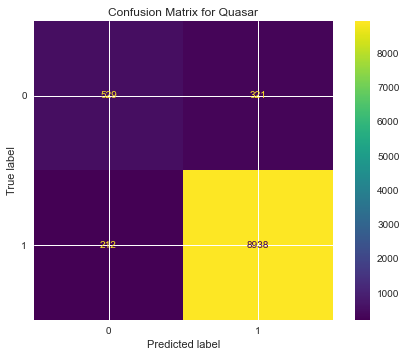

[[2898 1254]
 [4434 1414]]


<Figure size 576x396 with 0 Axes>

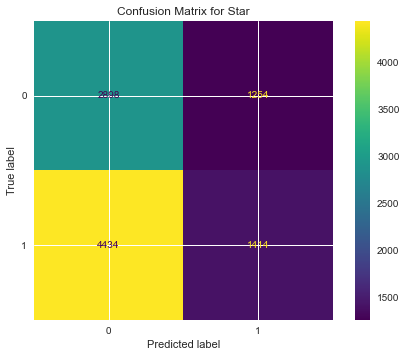

[[3382 1616]
 [2119 2883]]


<Figure size 576x396 with 0 Axes>

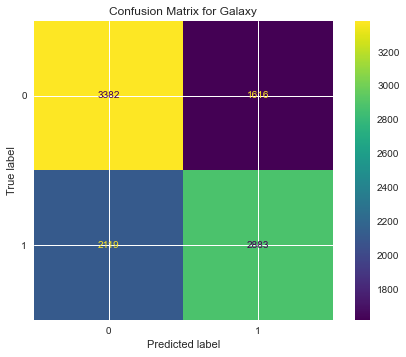

In [32]:
#Put your bonus code here. 
#Confusion Matrix Display calls: (note)Since I already created numpy arrays, all I had to do was call those within the broader function
#                                (note)Again, this probably could've been done with a loop +if than statement, but it was quicker to type it out
#confusion matrix quasar
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix(2,0,1))
disp.plot()
plt.title('Confusion Matrix for Quasar')
plt.savefig('ConfuionMatrixForQuasar.png')
plt.show()
#confusion matrix star
plt.figure()
disp1 = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix(1,2,0))
disp1.plot()
plt.title('Confusion Matrix for Star')
plt.savefig('ConfusionMatrixForStar.png')
plt.show()
#confusion matrix galaxy
plt.figure()
disp2 = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix(0,1,2))
disp2.plot()
plt.title('Confusion Matrix for Galaxy')
plt.savefig('ConfusionMatrixForGalaxy.png')
plt.show()

---

## g) Pair Plot
Make the "pair plot" for the data. **Hint:** We made this in HW09 for the Iris dataset, but we learned a much easier way to do it later in the course (class23).

<Figure size 576x396 with 0 Axes>

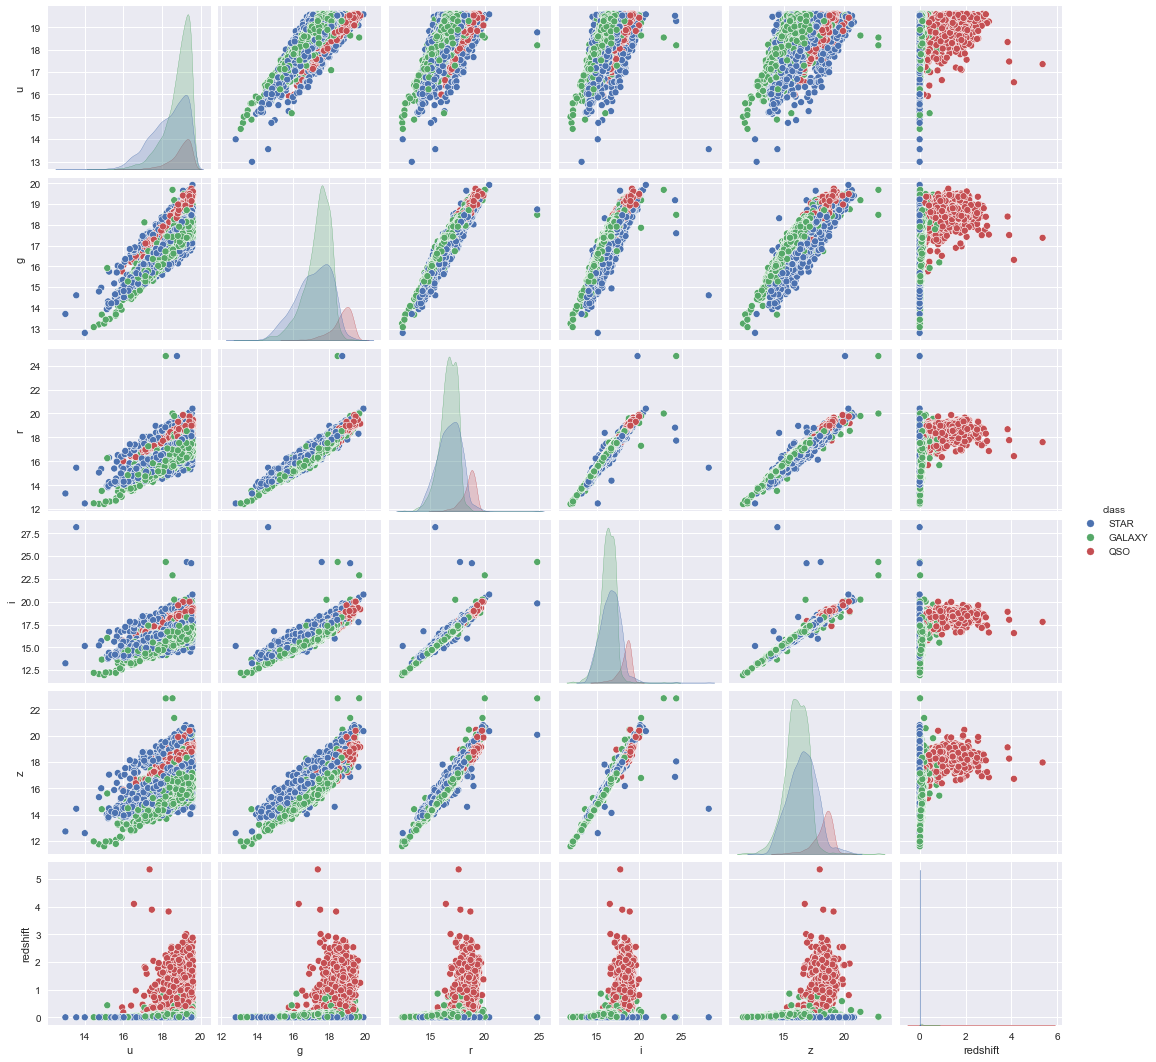

In [34]:
# Put your code here
#creation of pairplot using sns.pairplot
plt.figure()
sns.pairplot(sky_df,hue='class')
plt.savefig('PairplotTotal.png')
plt.show()

answer located on question below

---

## h) Features for Classification

**Based on the pair plot, explain which features might be most useful in classification.**

Let's simplify the dataset into just two classes: star v/s galaxy. The Quasar (QSO) is pretty easy to identify, so let's not waste energy on that. Quasars are much farther away than observable stars and galaxies, so they have much higher redshifts. Anyway, use the loc method that we used in class24 notebook (to drop setosa) to remove the Quasars from the dataset.

Also, redshift information makes this problem too easy. We don't want that! Remove redshift from the dataset as well. Make the new pair plot. There, that should look much more challenging! 

I see some outliers in the pair plot. **You don't have to actually do it, but explain what kind of algorithm you might use to remove outliers. Why might it be important to clean up the dataset by removing outliers?**

<Figure size 576x396 with 0 Axes>

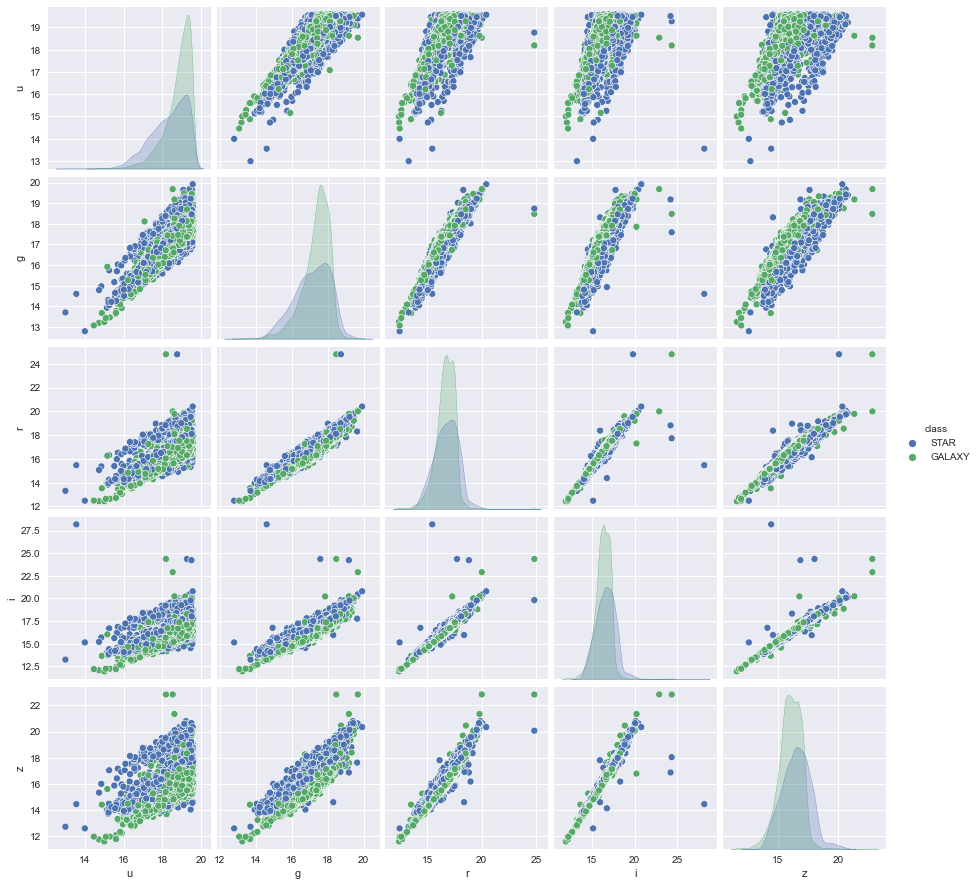

In [35]:
# Put your code here
#code that gets red of QSO and redshift
plt.figure()
sky_df_drop = sky_df.loc[sky_df["class"] != 'QSO']
sky_df_droptot = sky_df_drop.drop(columns = ['redshift'])
#pairplot
sns.pairplot(sky_df_droptot,hue='class')
plt.savefig('PaiplotDropQuasarandRedshift.png')

Classification: Interestingly, it seems based on this data that it is quite difficult to classify something based on whether it is a star or a galaxy, given that there is quite the overlap between their values. However, some distributed values stand out. First, one could observe the u vs z score. Here, there seems to be a pretty obvious line which goes down the center of the two 'blobs'. Given this, if one could find a relatively accurate equation for that line of seperation, they could classify star vs. galaxy over what side of the line each point(u,z) ends up landing on. Further, the comparison between the u score and other functions, given that the u score has the most star values that lie farther outside the relatively tight standard deviation of the galaxy values, seems to be quite a valuable first aproach. Of course, this would use a similar process as described before.


Algorithm:To create this algorithm, first one would creae a line of best fit goint through the data. Then, using that line, one would come up with a system to test how far the average data point, using the distance formula, varies from that line. Once this is found, any points outside that average distance would be deleted from the graph. 

---

## i) Training the Neural Network
Train a neural network to classify stars and galaxies using the reduced dataset that you made in part h. The question is, how well can you classify star v/s galaxy based on the 5 bands of light data from the SDSS? Play with the hyperparameters a little and see how it affects the accuracy_score to make sure you have a somewhat optimized network. Remember to scale data, since this is crucial in the MLP (class24). **Show the farction of correctly classified samples.**

In [24]:
# Put your code here
#creates the two sets of data used to create the split data
x_sky = sky_df_droptot.drop('class',axis=1)
x_sky.shape
y_sky = sky_df_droptot['class']
y_sky.shape
xtrain,xtest,ytrain,ytest = train_test_split(x_sky,y_sky,random_state=1) #data split into the different categories
#BEGGINNING OF THE MLP CLASSIFIER
model1 = MLPClassifier(solver = 'lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1,max_iter=5000)#(note)Interestingly, the best accuracy score came from the classwork pre-set values, with the notable exception of changing the max_iter
#scaling the data
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)
#running the neural network
model1.fit(xtrain,ytrain)#fits the model with the appropriate data
y_model1 = model1.predict(xtest)#predicts the the x data
acscore = accuracy_score(ytest, y_model1)#accuracy score

cm = confusion_matrix(ytest,y_model1)#confusion matrix to demonstrate true positive, false positive, etc
#print statements
print(f'accuracy score:{acscore}')
print('\n confusion matrix:\n',confusion_matrix(ytest,y_model1),'\n')
print(f'the confusion matrix demonstrates that the model classifed {cm[0][0]+cm[1][1]}/{np.sum(cm)} correctly ')

accuracy score:0.9777097902097902

 confusion matrix:
 [[1218   37]
 [  14 1019]] 

the confusion matrix demonstrates that the model classifed 2237/2288 correctly 


Put your narrative here

---

## j) Understanding your Neural Network classification performance

Plot the Confusion Matrix and **explain what it means**. Make the ROC curve (class24) and **explain what it means**. 

<Figure size 576x396 with 0 Axes>

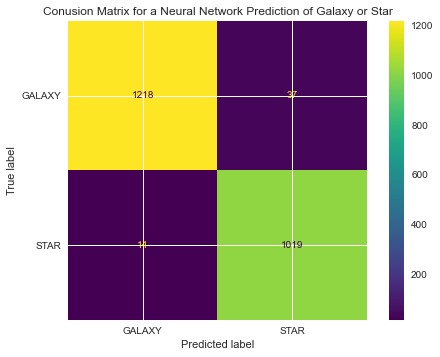

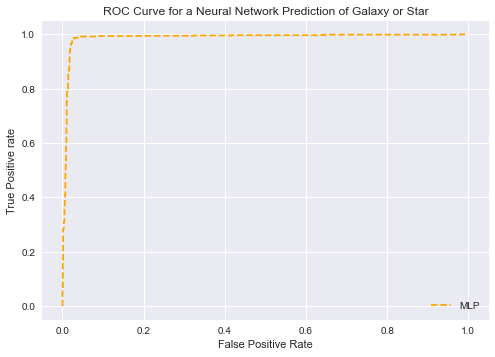

In [40]:
# Put your code here
#Creating the figure
plt.figure()

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)#confusion matrix display
disp.plot()
plt.title('Conusion Matrix for a Neural Network Prediction of Galaxy or Star')
plt.savefig('NeuralNetworkConfusionMatrix.png')
plt.show()
plt.figure()
#Logic to classify values for the ROC curve 
ytest_bin=[]
for value in ytest:
    variety=-1
    if value=="GALAXY":
        variety=0
    elif value=="STAR":
        variety=1
    else:
        print("NO MATCH")
    ytest_bin.append(variety)

#creation of the ROC Curve
fpr2, tpr2, threshold = roc_curve(ytest_bin, model1.predict_proba(xtest)[:,1])
plt.style.use('seaborn')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='MLP')
plt.title('ROC Curve for a Neural Network Prediction of Galaxy or Star')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('NeuralNetworkROCCurve.png')
plt.show()

Confusion Matrix: The confusion matrix demonstrates the total breakdown of how the model's accuracy and inaccuracy in predicting the appropriate class for the data. Going based of cartesian math quadrents(upper right = I, upper left = II, etc. ), quadrent I demonstrates the Galaxies predicted as stars, quadrent two represents the number of galaxys correctly predicted as galaxys, quadrant three repreesnts the number of stars predicted as galaxies, and quadrant four represets the number of stars predecited as stars. Here, the higher the number the closer the color gets to yellow, and the lower the number the closer it is to purple. 

ROC Curve: A perfect ROC curve represents a perfect model, and it does so by essentially being a straight line curve (y = 1,x = 0) with at point at (0,1). My model is very, close, however, it doesn't quite make it. Basically, the point of this graph is that where the graph changes from 'vertical' to 'horizontal' is considered the optimal threshold, the point where we can get the highest true positive rate and the lowest false positive rate. By running our model at this threshhold, we will get the best possible outputs. Further, because this point exists, it proves our model is a better model than say a coin or anything below the y=x curve. 

---

## Bonus (+5)

Awarded to the student(s) who can train the most successful network- that is, find the best set of hyperparameters (as judged by scikit-learn's accuracy_score applied to a random subset of the sample). If you want to compete for these points, you need to include a clearly labeled bonus section of your notebook (or a bonus program username_bonus.py) that loads the dataset and trains the NN with your optimal hyperparameters. There are many ways to optimize your hyperparameters. You may want to write a program to scan through values of hyperparameters and train a NN with each set, recording how it performs, and the parameters you used.  Or, maybe submit a bunch of batch jobs will be necessary? Anyway, it's bonus - do whatever you want - but **make sure to explain what you did**!  

In [27]:
# Bonus code here
#n/a

Put your bonus narrative here